****
## JSON exercise (Aziz)

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [186]:
#import packages
import os
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [187]:
#define path to data file
WB_JSON=os.getcwd()+"""\\data\\world_bank_projects.json"""

In [188]:
#open JSON file in read-only within context manager
with open(WB_JSON, 'r') as file:
    wb_json_data = json.load(file)

In [189]:
# check type of loaded data
print(type(wb_json_data))

<class 'list'>


In [190]:
#check number of items in list
print(len(wb_json_data))

500


In [191]:
# List of what ?
print(type(wb_json_data[0]))

<class 'dict'>


In [192]:
#list of Dictionaries, what are the keys of the key-value pairs ?
print(wb_json_data[0].keys())

dict_keys(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline', 'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode', 'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty', 'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt', 'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4', 'prodlinetext', 'productlinetype', 'regionname', 'status', 'country_namecode', 'envassesmentcategorycode', 'project_abstract', 'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype', 'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3', 'majorsector_percent', 'board_approval_month', 'theme_namecode', 'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt', 'sector_namecode', '_id'])


In [193]:
#Normalize and take a quick look at some of the values
print(json_normalize(wb_json_data).head(5))

                   _id.$oid approvalfy board_approval_month  \
0  52b213b38594d8a2be17c780       1999             November   
1  52b213b38594d8a2be17c781       2015             November   
2  52b213b38594d8a2be17c782       2014             November   
3  52b213b38594d8a2be17c783       2014              October   
4  52b213b38594d8a2be17c784       2014              October   

      boardapprovaldate                                 borrower  \
0  2013-11-12T00:00:00Z  FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA   
1  2013-11-04T00:00:00Z                    GOVERNMENT OF TUNISIA   
2  2013-11-01T00:00:00Z   MINISTRY OF FINANCE AND ECONOMIC DEVEL   
3  2013-10-31T00:00:00Z   MIN. OF PLANNING AND INT'L COOPERATION   
4  2013-10-31T00:00:00Z                      MINISTRY OF FINANCE   

            closingdate                              country_namecode  \
0  2018-07-07T00:00:00Z  Federal Democratic Republic of Ethiopia!$!ET   
1                   NaN                      Republic of Tunisia!$

In [194]:
# load JSON as pandas df
json_df = pd.read_json(WB_JSON)
json_df.head(10)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 87, 'Name': 'Other rural developme...","[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{'$oid': '52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{'Percent': 33, 'Name': 'Other accountability/...","[{'code': '29', 'name': 'Other accountability/...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


In [195]:
# count non-null values for each column
json_df.count()

_id                         500
approvalfy                  500
board_approval_month        500
boardapprovaldate           500
borrower                    485
closingdate                 370
country_namecode            500
countrycode                 500
countryname                 500
countryshortname            500
docty                       446
envassesmentcategorycode    430
grantamt                    500
ibrdcommamt                 500
id                          500
idacommamt                  500
impagency                   472
lendinginstr                495
lendinginstrtype            495
lendprojectcost             500
majorsector_percent         500
mjsector_namecode           500
mjtheme                     491
mjtheme_namecode            500
mjthemecode                 500
prodline                    500
prodlinetext                500
productlinetype             500
project_abstract            362
project_name                500
projectdocs                 446
projectf

### 1- Find the 10 countries with most projects

Since each row seems to represent a project and there are no null values in the **'countryshortname'** and **'project_name'** columns,
we can use that to count the instances of each country

In [196]:
#with value counts
wb_json_country_count = json_df['countryshortname'].value_counts(sort=True, ascending=False)
print('10 Countries with the most projects:')
print(wb_json_country_count.head(10))

10 Countries with the most projects:
China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Nepal                 12
Morocco               12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64


This can also be done with a groupby in pandas:

In [197]:
top_10_countries = pd.DataFrame(json_df.groupby('countryshortname')['project_name'].count().sort_values(ascending = False).rename_axis('Country').reset_index(name='counts'))
top_10_countries=top_10_countries.head(10)
top_10_countries

,Country,counts
0,Indonesia,19
1,China,19
2,Vietnam,17
3,India,16
4,"Yemen, Republic of",13
5,Nepal,12
6,Bangladesh,12
7,Morocco,12
8,Mozambique,11
9,Africa,11


###  2- Find the top 10 major project themes (using column 'mjtheme_namecode')

Take a quick look at the column 'mjtheme_namecode' 

In [198]:
json_df['mjtheme_namecode'].head(20)

0     [{'code': '8', 'name': 'Human development'}, {...
1     [{'code': '1', 'name': 'Economic management'},...
2     [{'code': '5', 'name': 'Trade and integration'...
3     [{'code': '7', 'name': 'Social dev/gender/incl...
4     [{'code': '5', 'name': 'Trade and integration'...
5     [{'code': '6', 'name': 'Social protection and ...
6     [{'code': '2', 'name': 'Public sector governan...
7     [{'code': '11', 'name': 'Environment and natur...
8     [{'code': '10', 'name': 'Rural development'}, ...
9     [{'code': '2', 'name': 'Public sector governan...
10    [{'code': '10', 'name': 'Rural development'}, ...
11    [{'code': '10', 'name': 'Rural development'}, ...
12                          [{'code': '4', 'name': ''}]
13    [{'code': '5', 'name': 'Trade and integration'...
14    [{'code': '6', 'name': 'Social protection and ...
15    [{'code': '10', 'name': 'Rural development'}, ...
16    [{'code': '10', 'name': 'Rural development'}, ...
17    [{'code': '8', 'name': 'Human development'

It seems to be made up of nested JSON objects itself, will need to be normalized.

In [199]:
# define a function to normalize a given json object in json_df
def norm_JSON_object(field):
    objectJsonList = json_df[field].tolist()
    norm_dfs=[json_normalize(element)for element in objectJsonList]
    return pd.concat(norm_dfs, ignore_index=True)

In [200]:
#Pass 'mjtheme_namecode' to above Function to normalize the theme and create a dataframe
col_to_norm='mjtheme_namecode'
namecode_theme_df=norm_JSON_object(col_to_norm)
namecode_theme_df.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [201]:
# check for NaNs 
namecode_theme_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [202]:
#Check for the blank code and name
print('blank code count:')
print(namecode_theme_df[namecode_theme_df.code==''].count())
print('blank name count:')
print(namecode_theme_df[namecode_theme_df.name==''].count())

blank code count:
code    0
name    0
dtype: int64
blank name count:
code    122
name    122
dtype: int64


That confirms that there are missing names as stated in query 3 but there seems to be no missing codes

Let's Get the top 10 themes:

In [203]:
# Get the top 10 theme names
top_10_themes = pd.DataFrame(namecode_theme_df[namecode_theme_df.name != ''].name.value_counts().sort_values(ascending = False).rename_axis('Theme').reset_index(name='counts'))
top_10_themes = top_10_themes.head(10)
top_10_themes

,Theme,counts
0,Environment and natural resources management,223
1,Rural development,202
2,Human development,197
3,Public sector governance,184
4,Social protection and risk management,158
5,Financial and private sector development,130
6,Social dev/gender/inclusion,119
7,Trade and integration,72
8,Urban development,47
9,Economic management,33


Note that the counts may not be entirely accurate since some names are missing but that was ignored for now since that issue will be addressed in query 3.

### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

Since only the names have missing values, we might be able to fill the missing names from their codes in other instances. but first let's compare the number of unique names and codes to see if that would work.

In [204]:
# find count of unique codes as a reference
namecode_theme_df['code'].nunique()


11

In [205]:
# Get distinct combinations of code and name in "namecode_theme_df"
dist_namecode_theme_df=namecode_theme_df.drop_duplicates()
dist_namecode_theme_df

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
13,6,


In [206]:
#get rid of the rows with blank names
dist_namecode_theme_df = dist_namecode_theme_df[dist_namecode_theme_df.name != '']
dist_namecode_theme_df

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


In [207]:
#reset the index
dist_namecode_theme_df = dist_namecode_theme_df.reset_index().drop('index',axis=1)
dist_namecode_theme_df

,code,name
0,8,Human development
1,1,Economic management
2,6,Social protection and risk management
3,5,Trade and integration
4,2,Public sector governance
5,11,Environment and natural resources management
6,7,Social dev/gender/inclusion
7,4,Financial and private sector development
8,10,Rural development
9,9,Urban development


We now have a name for each distinct code and can use the above table as a reference to fill in the missing ones.

In [208]:
filled_names_theme_df = pd.merge(namecode_theme_df, dist_namecode_theme_df, on='code', suffixes=('_x','')).drop('name_x' , axis=1)
filled_names_theme_df.head(10)

,code,name
0,8,Human development
1,8,Human development
2,8,Human development
3,8,Human development
4,8,Human development
5,8,Human development
6,8,Human development
7,8,Human development
8,8,Human development
9,8,Human development


After we filled the missing names in the dataframe, the new correct counts of themes would be:

In [209]:
print('The new theme counts are:')
theme_counts=pd.DataFrame(filled_names_theme_df['name'].value_counts().rename_axis('Theme').reset_index(name='counts'))
theme_counts

The new theme counts are:


,Theme,counts
0,Environment and natural resources management,250
1,Rural development,216
2,Human development,210
3,Public sector governance,199
4,Social protection and risk management,168
5,Financial and private sector development,146
6,Social dev/gender/inclusion,130
7,Trade and integration,77
8,Urban development,50
9,Economic management,38


And the top 10 themes are:

In [210]:
print('The top 10 themes are:')
top_10_themes_new=theme_counts.head(10)
top_10_themes_new

The top 10 themes are:


,Theme,counts
0,Environment and natural resources management,250
1,Rural development,216
2,Human development,210
3,Public sector governance,199
4,Social protection and risk management,168
5,Financial and private sector development,146
6,Social dev/gender/inclusion,130
7,Trade and integration,77
8,Urban development,50
9,Economic management,38


In [211]:
top_10_countries


,Country,counts
0,Indonesia,19
1,China,19
2,Vietnam,17
3,India,16
4,"Yemen, Republic of",13
5,Nepal,12
6,Bangladesh,12
7,Morocco,12
8,Mozambique,11
9,Africa,11


In [212]:
top_10_themes


,Theme,counts
0,Environment and natural resources management,223
1,Rural development,202
2,Human development,197
3,Public sector governance,184
4,Social protection and risk management,158
5,Financial and private sector development,130
6,Social dev/gender/inclusion,119
7,Trade and integration,72
8,Urban development,47
9,Economic management,33


In [213]:
top_10_themes_new

,Theme,counts
0,Environment and natural resources management,250
1,Rural development,216
2,Human development,210
3,Public sector governance,199
4,Social protection and risk management,168
5,Financial and private sector development,146
6,Social dev/gender/inclusion,130
7,Trade and integration,77
8,Urban development,50
9,Economic management,38


### Plot results:

### Top 10 countries:

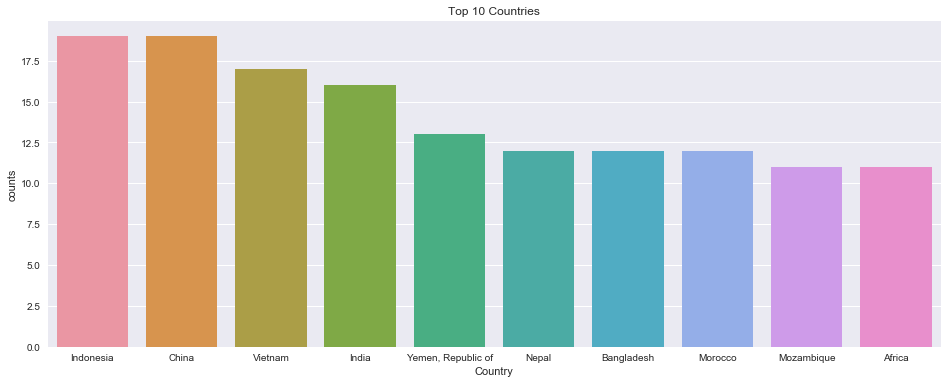

In [214]:
sns.set(color_codes=True)
plt.figure(figsize=(16, 6))
plt.title('Top 10 Countries')
sns.barplot('Country', 'counts', data=top_10_countries)

### Top 10 Themes

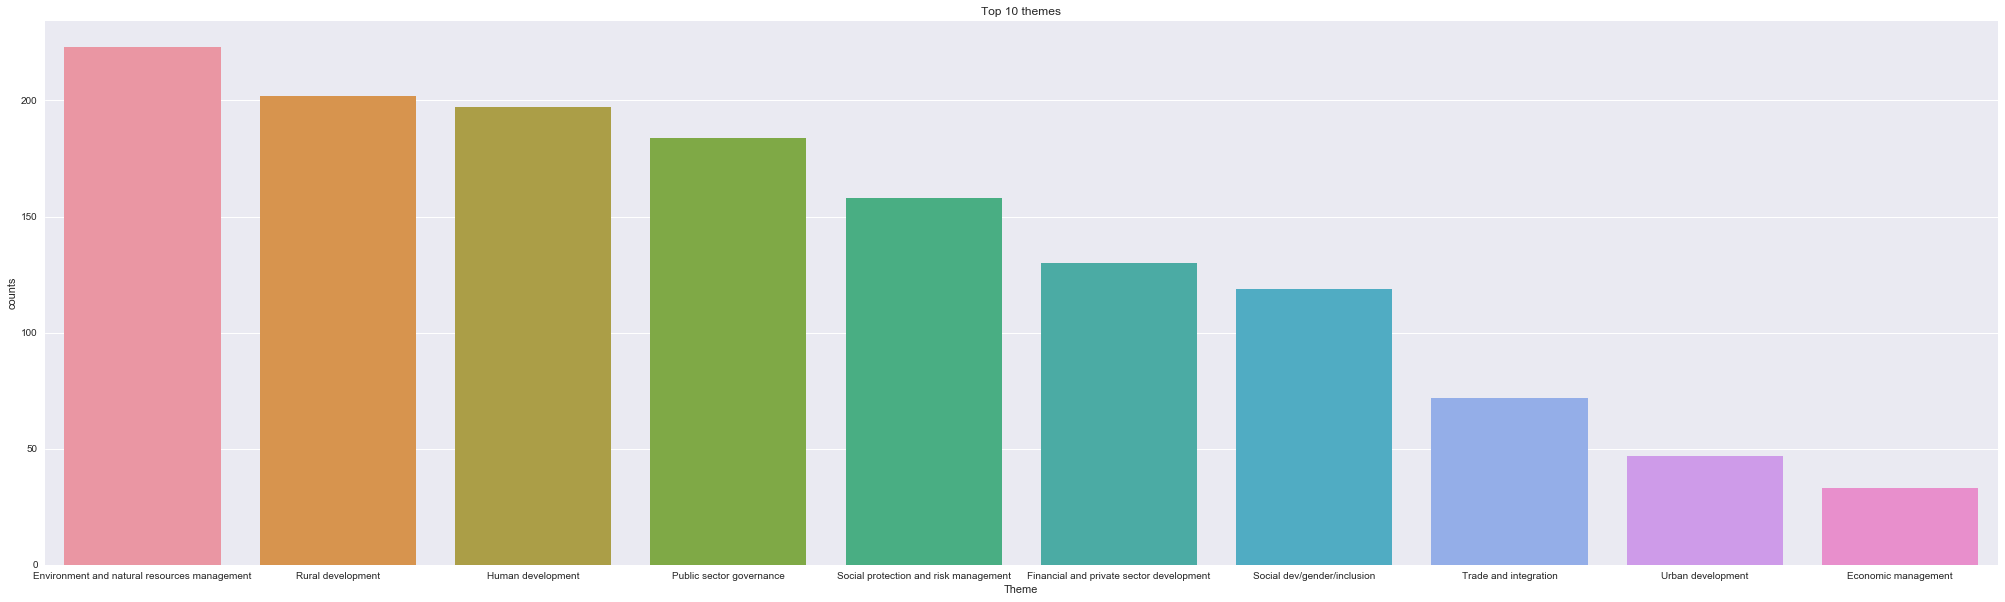

In [215]:
plt.figure(figsize=(35, 10))
plt.title('Top 10 themes')
sns.barplot('Theme', 'counts', data=top_10_themes)

### Top 10 themes after filling the missing names

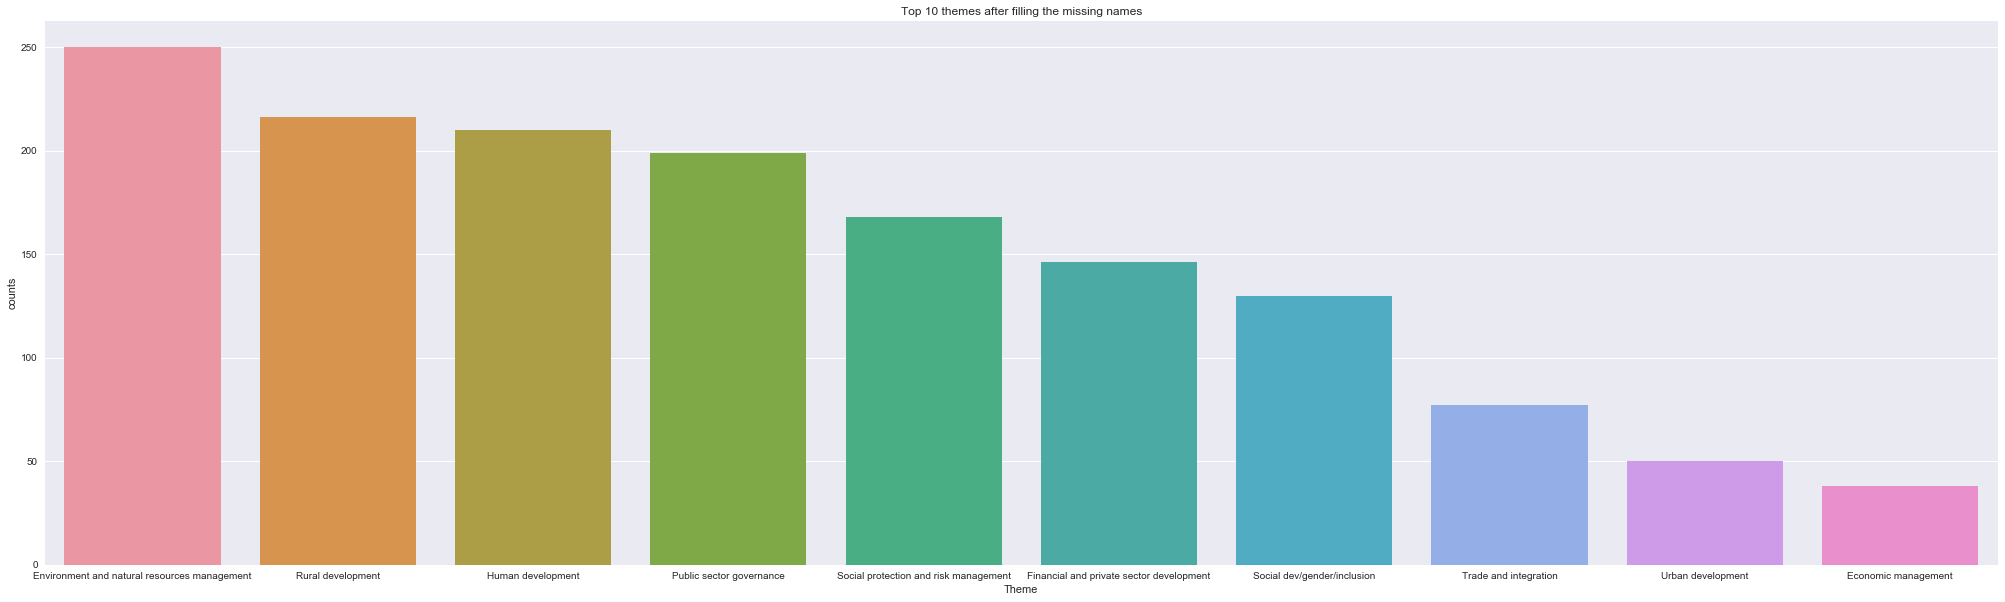

In [216]:
plt.figure(figsize=(35, 10))
plt.title('Top 10 themes after filling the missing names')
sns.barplot('Theme', 'counts', data=top_10_themes_new)